<a href="https://colab.research.google.com/github/chandankumar3it/boom-bike-ml-case-study/blob/main/BoomBikesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [103]:

#IMPORT NECESSARY LIBRARIES

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [104]:
#READ DATA
df=pd.read_csv("day.csv")

In [105]:
# view some sample records

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Quality Checks

In [106]:
# shape of the dataframe

df.shape

(730, 16)

In [107]:
#Get basic idea of data using describe()
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Insights:**
- **730 rows and 16 columns.**
- **From data dictionary we understood that:**
    - "instant" column is just a record index, this column can be removed.
    - "dteday" column is date column and we already have "month" and "year" columns in dataframe. Thus we can drop "dteday" column, it is not bringing any new information.
    - Addition of "casual" and "registered" columns gives "cnt" column, and we will not going to get much information from these columns, thus we wil drop these two as well.
- **There seems to be no missing values from non-null value count.**
- **TARGET variable/column is 'cnt'**

In [108]:
#To check columns present in dataset
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [109]:
#checking for null values in dataset

count=df.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


* **No missing values in the dataset**

In [110]:
#checking for datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [111]:
#Renaming the columns
df.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True)
df.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [112]:
#Mapping variables season, month, weathersit, weekday

df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['month']=df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Satd'})

df.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Visualisation

### Identify Continuous and Categorical Features

In [113]:
#Checking the unique values in the data
df.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

In [114]:
# dropping `instant`,`dteday`,`casual`,`registered`
df = df.drop(columns=['instant','dteday','casual','registered'])

* These variables were dropped since "instant" column is the just the indexing of the record, "dteday" is redundant.
* And The required data for analysis is contained in "mnth", "yr", "casual + registered = cnt"



In [115]:
# summary statistics of numerical variables
df[['temp','atemp','humidity','windspeed']].describe()

,temp,atemp,humidity,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


#### Visualising Numeric Variables

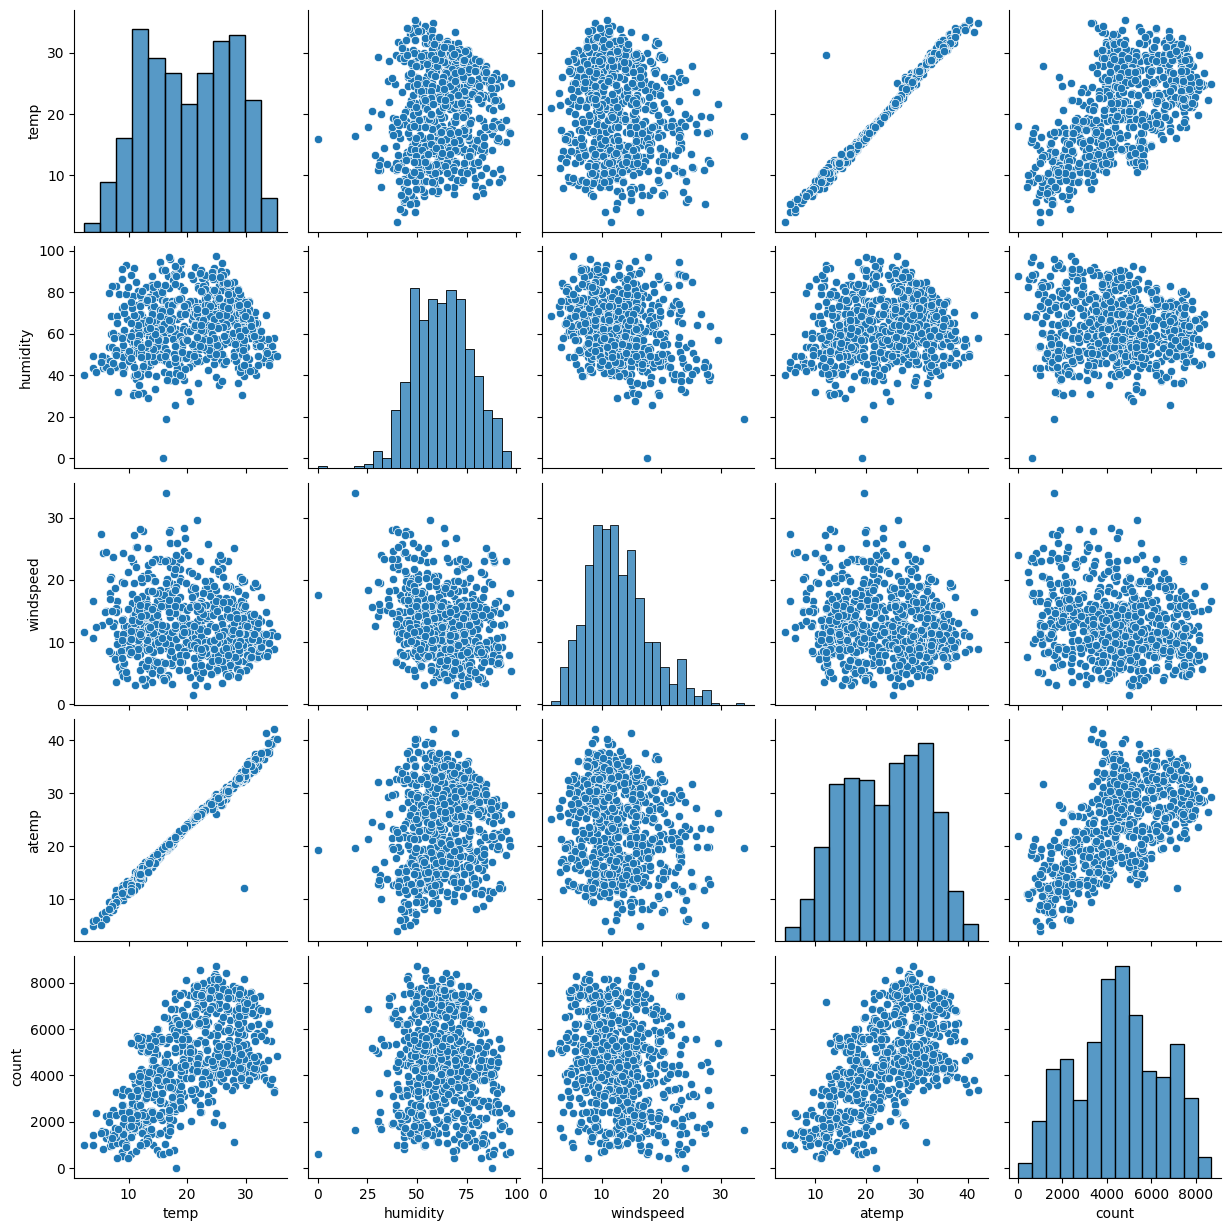

In [116]:
#Pairplot for numeric variables
sns.pairplot(df, vars=["temp", "humidity","windspeed","atemp","count"])
plt.show()

We can see that there are some independent variables look positively correlated to the 'count' variable.
-  Bike rentals are more correlated to temperature


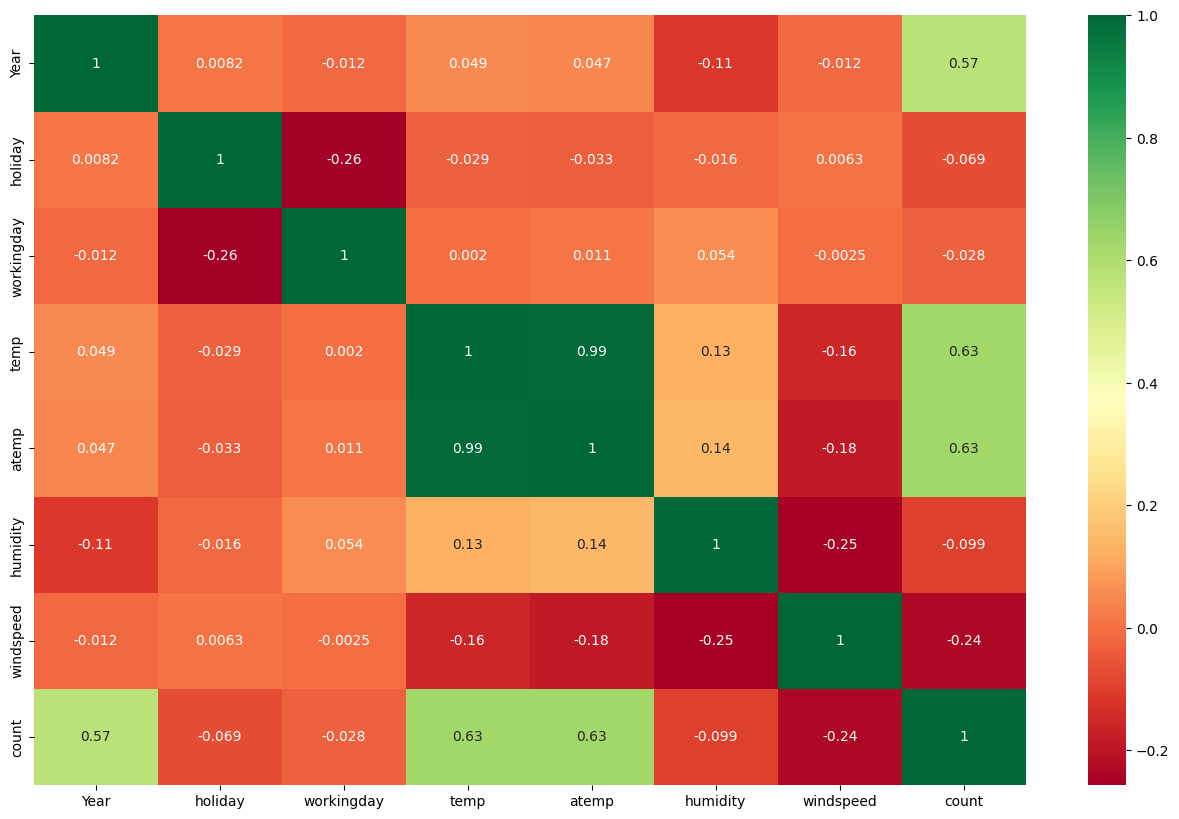

In [117]:
# from above graphs we can say that temp and atemp have a relationship
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="RdYlGn")
plt.show()

### Visualising Categorical Variables

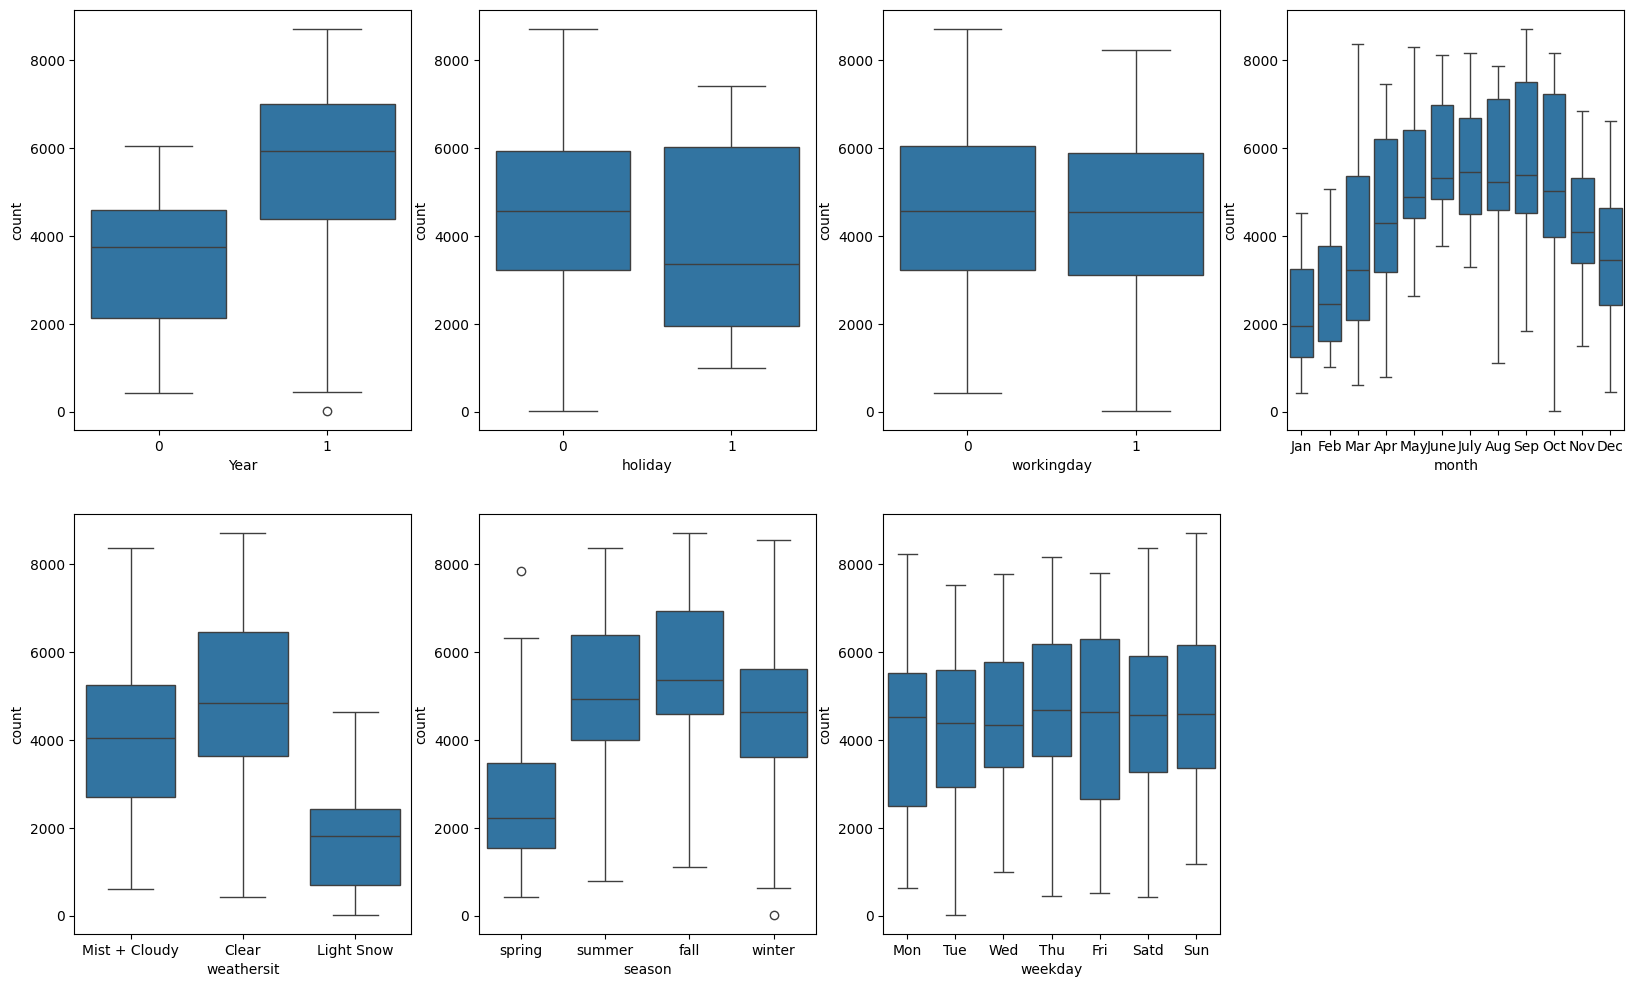

In [118]:
#Relationship between categorical and continuous variable

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'Year', y = 'count', data = df)

plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'count', data = df)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'count', data = df)

plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'count', data = df)

plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'count', data = df)

plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'count', data = df)

plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'count', data = df)

plt.show()

Insights shows the relationship between categorical variables and a Target variable.  
- Bike Rentals are more :
    -  During the "fall season" and "summer seaon"
    -  In the year 2019 compared to 2018
    -  In partly cloudy weather
    -  On Saturday, wednesday and thursday

## Univariate Analysis

#### Outliers in Categorical Variables vs count

In [119]:
df.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [121]:
# Dropping outliers in Categorical Variables
df = df.drop(index = df[(df['season'] == 'spring') & (df['count'] > 7000)].index)

In [122]:
df.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Correlation

<Axes: >

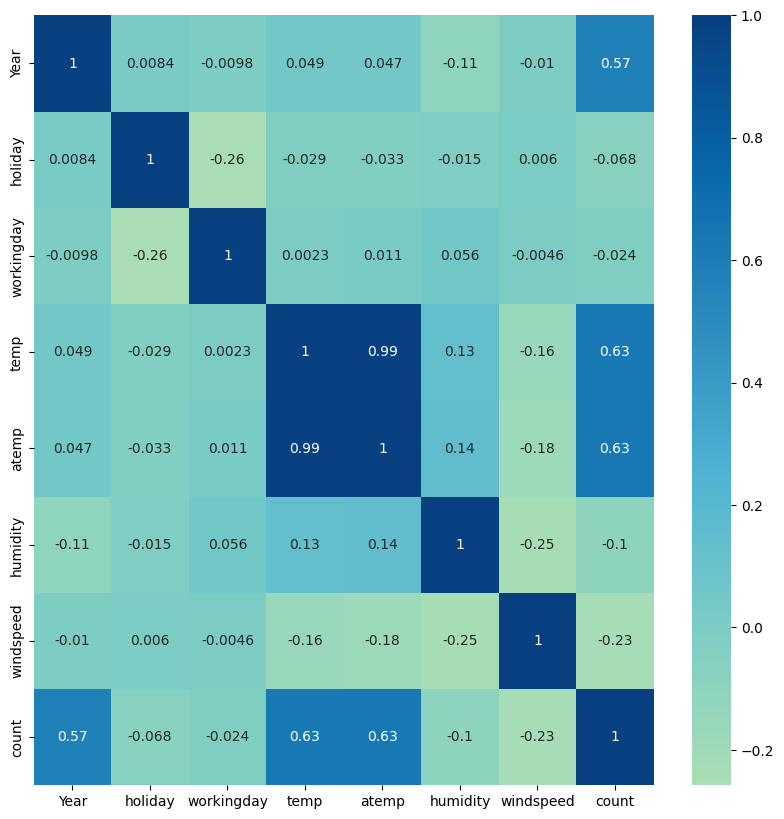

In [123]:
# correlation among variables
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),cmap='GnBu',center=0,annot=True)

We can see temp, atemp variables are correlated to 'count' variable
* We can also see some other variables are also most correlated.
* Both the plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model
* From this we can Linear Regression Model.

**Highest correlation with count is seen in temp followed by Year**

In [124]:
#drop unnecessary columns

df=df.drop(['atemp'], axis=1)
df.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


## Data Preparation

### Creating Indicator variables

In [125]:
# creating indicator variable columns
season_indicators = pd.get_dummies(df['season'],drop_first=True)
mnth_indicators = pd.get_dummies(df['month'],drop_first=True)
weekday_indicators = pd.get_dummies(df['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(df['weathersit'],drop_first=True)

In [126]:
df.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [127]:
# adding indicator variable columns to the dataset.
df = pd.concat([df,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)


In [128]:
df.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,Oct,Sep,Mon,Satd,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,spring,0,Jan,0,Mon,1,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tue,1,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df.columns

Index(['season', 'Year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'humidity', 'windspeed', 'count', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Satd', 'Sun', 'Thu', 'Tue', 'Wed',
       'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [130]:
# Drop 'season','month','weekday','weathersit'
df = df.drop(columns=['season','month','weekday','weathersit'])
df.head()

,Year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Oct,Sep,Mon,Satd,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
#Number of rows and columns
df.shape

(729, 29)

In [132]:
df.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'count', 'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan',
       'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Satd', 'Sun',
       'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

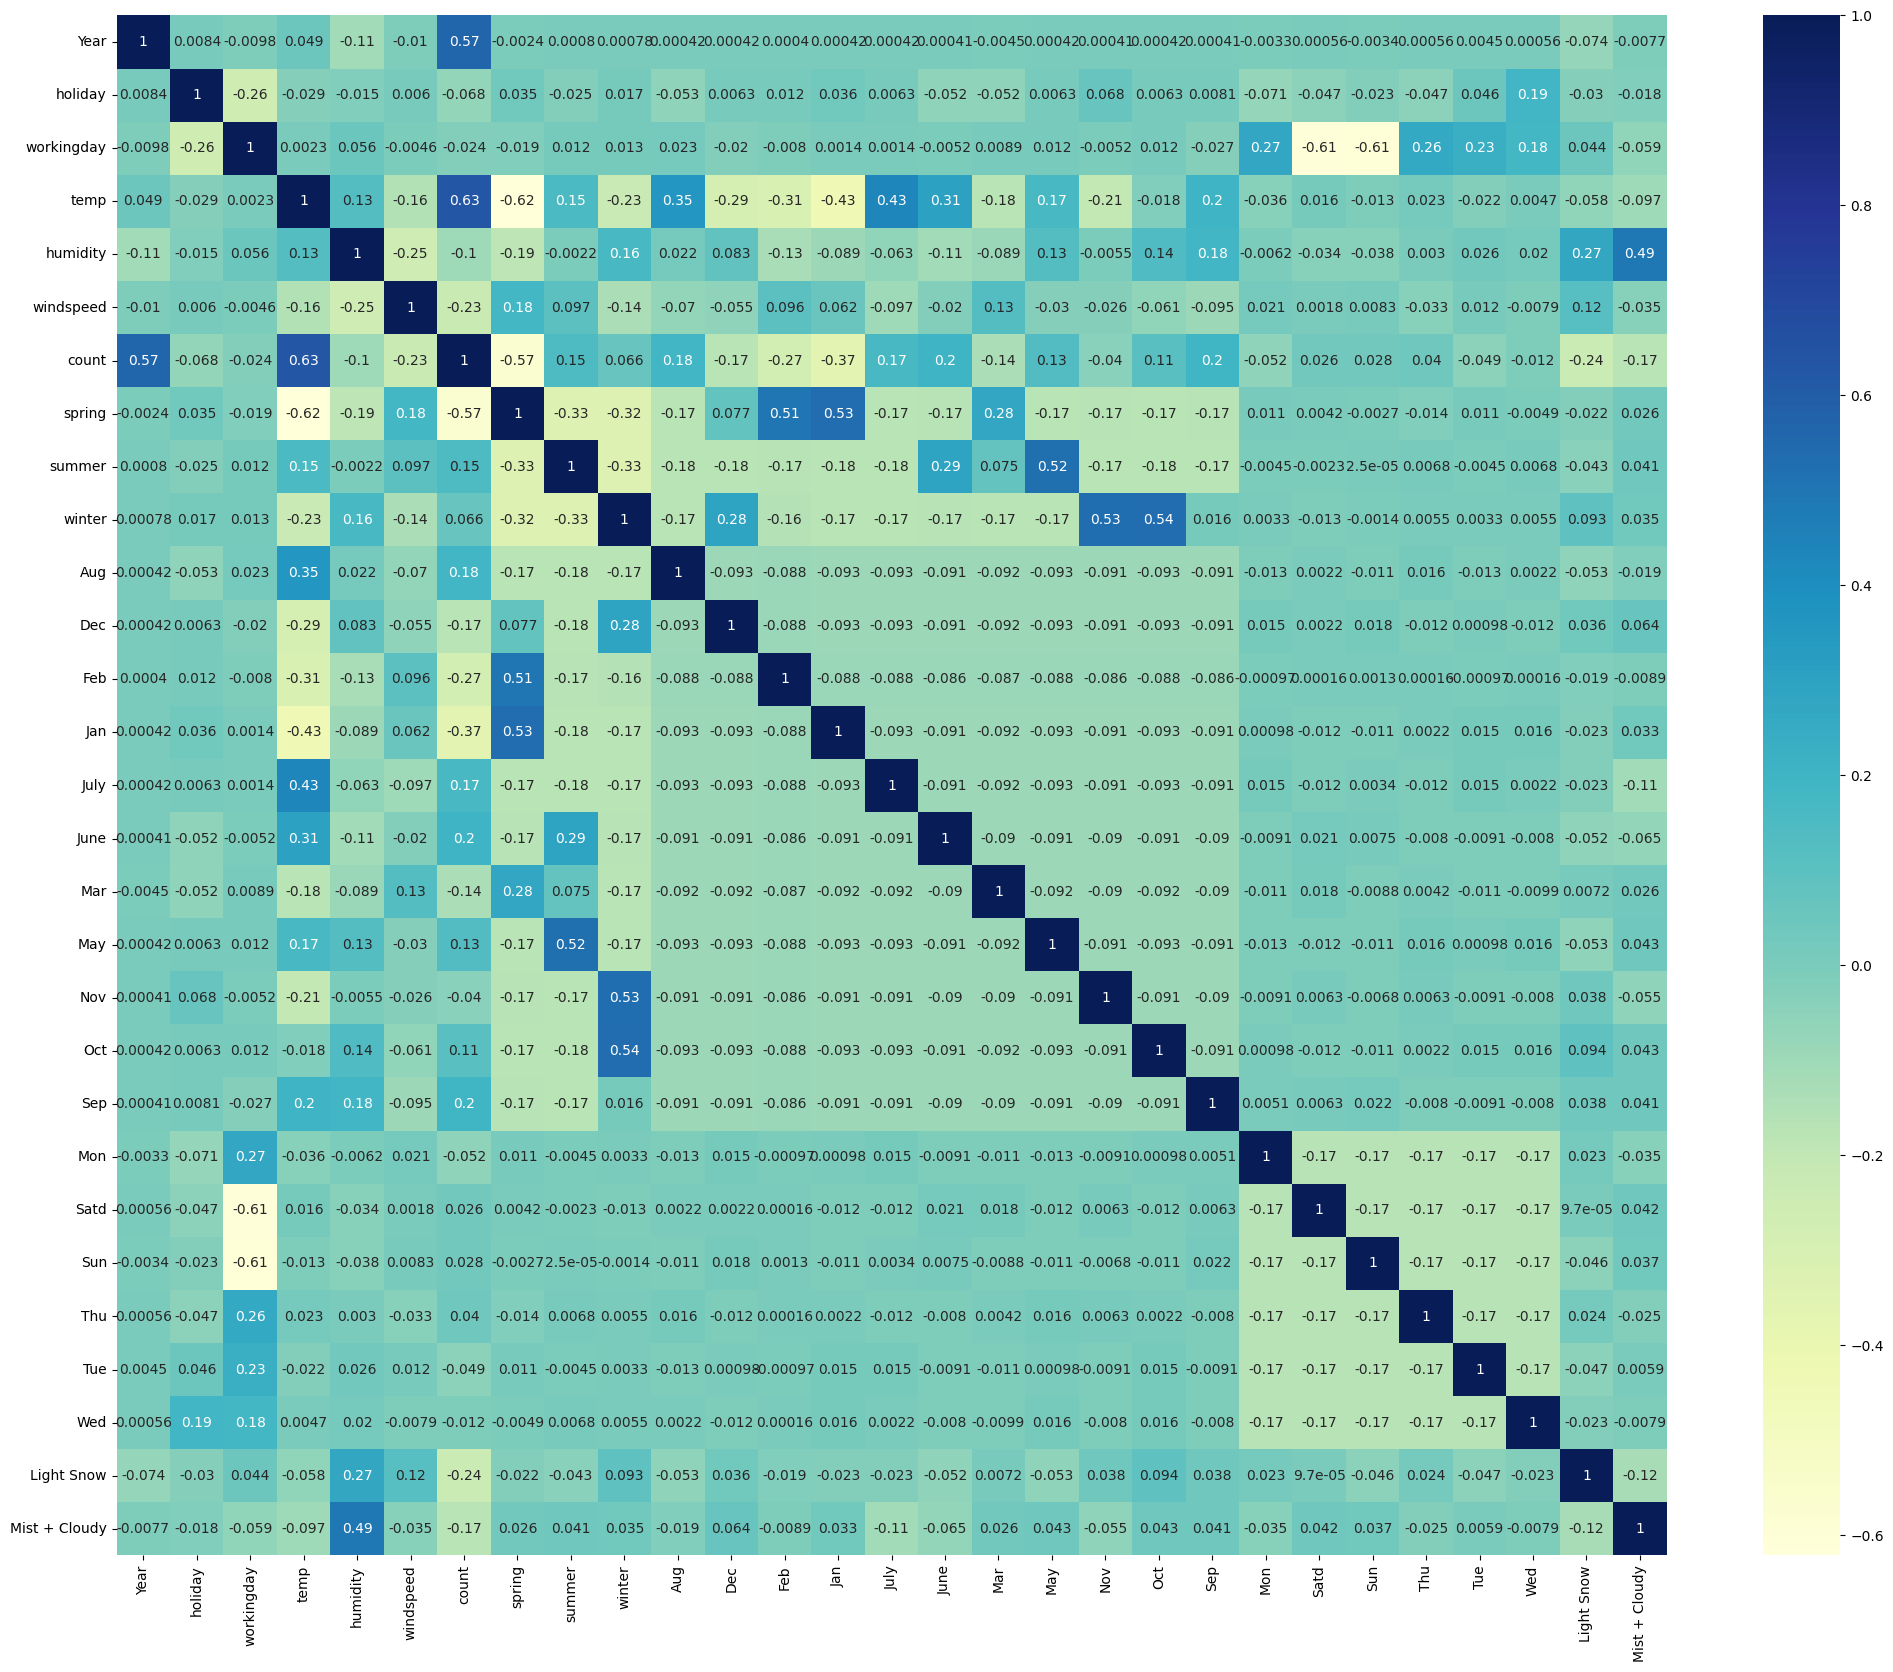

In [133]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables

plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.show()

**Temperature,Summer season,June to october months are in good correlation with the 'count' variable & seem to have good influence on the number of bike rentals.**

## Splitting the Data into Training and Testing Sets

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
df_train, df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

## Scaling Numerical Features

In [136]:
# normalization of continuous variables
from sklearn.preprocessing import MinMaxScaler
numerical_scaler = MinMaxScaler()

num_vars = ['temp','humidity','windspeed']

numerical_scaler.fit(df_train[num_vars])

df_train[num_vars] = numerical_scaler.transform(df_train[num_vars])

In [137]:
df_train.head()

,Year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,...,Oct,Sep,Mon,Satd,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
626,1,0,1,0.614763,0.553027,0.371638,7591,0,0,0,...,0,1,0,0,0,1,0,0,0,0
363,0,0,0,0.314673,0.656076,0.197852,2999,1,0,0,...,0,0,0,0,1,0,0,0,0,0
425,1,0,0,0.366591,0.677114,0.220569,3194,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1


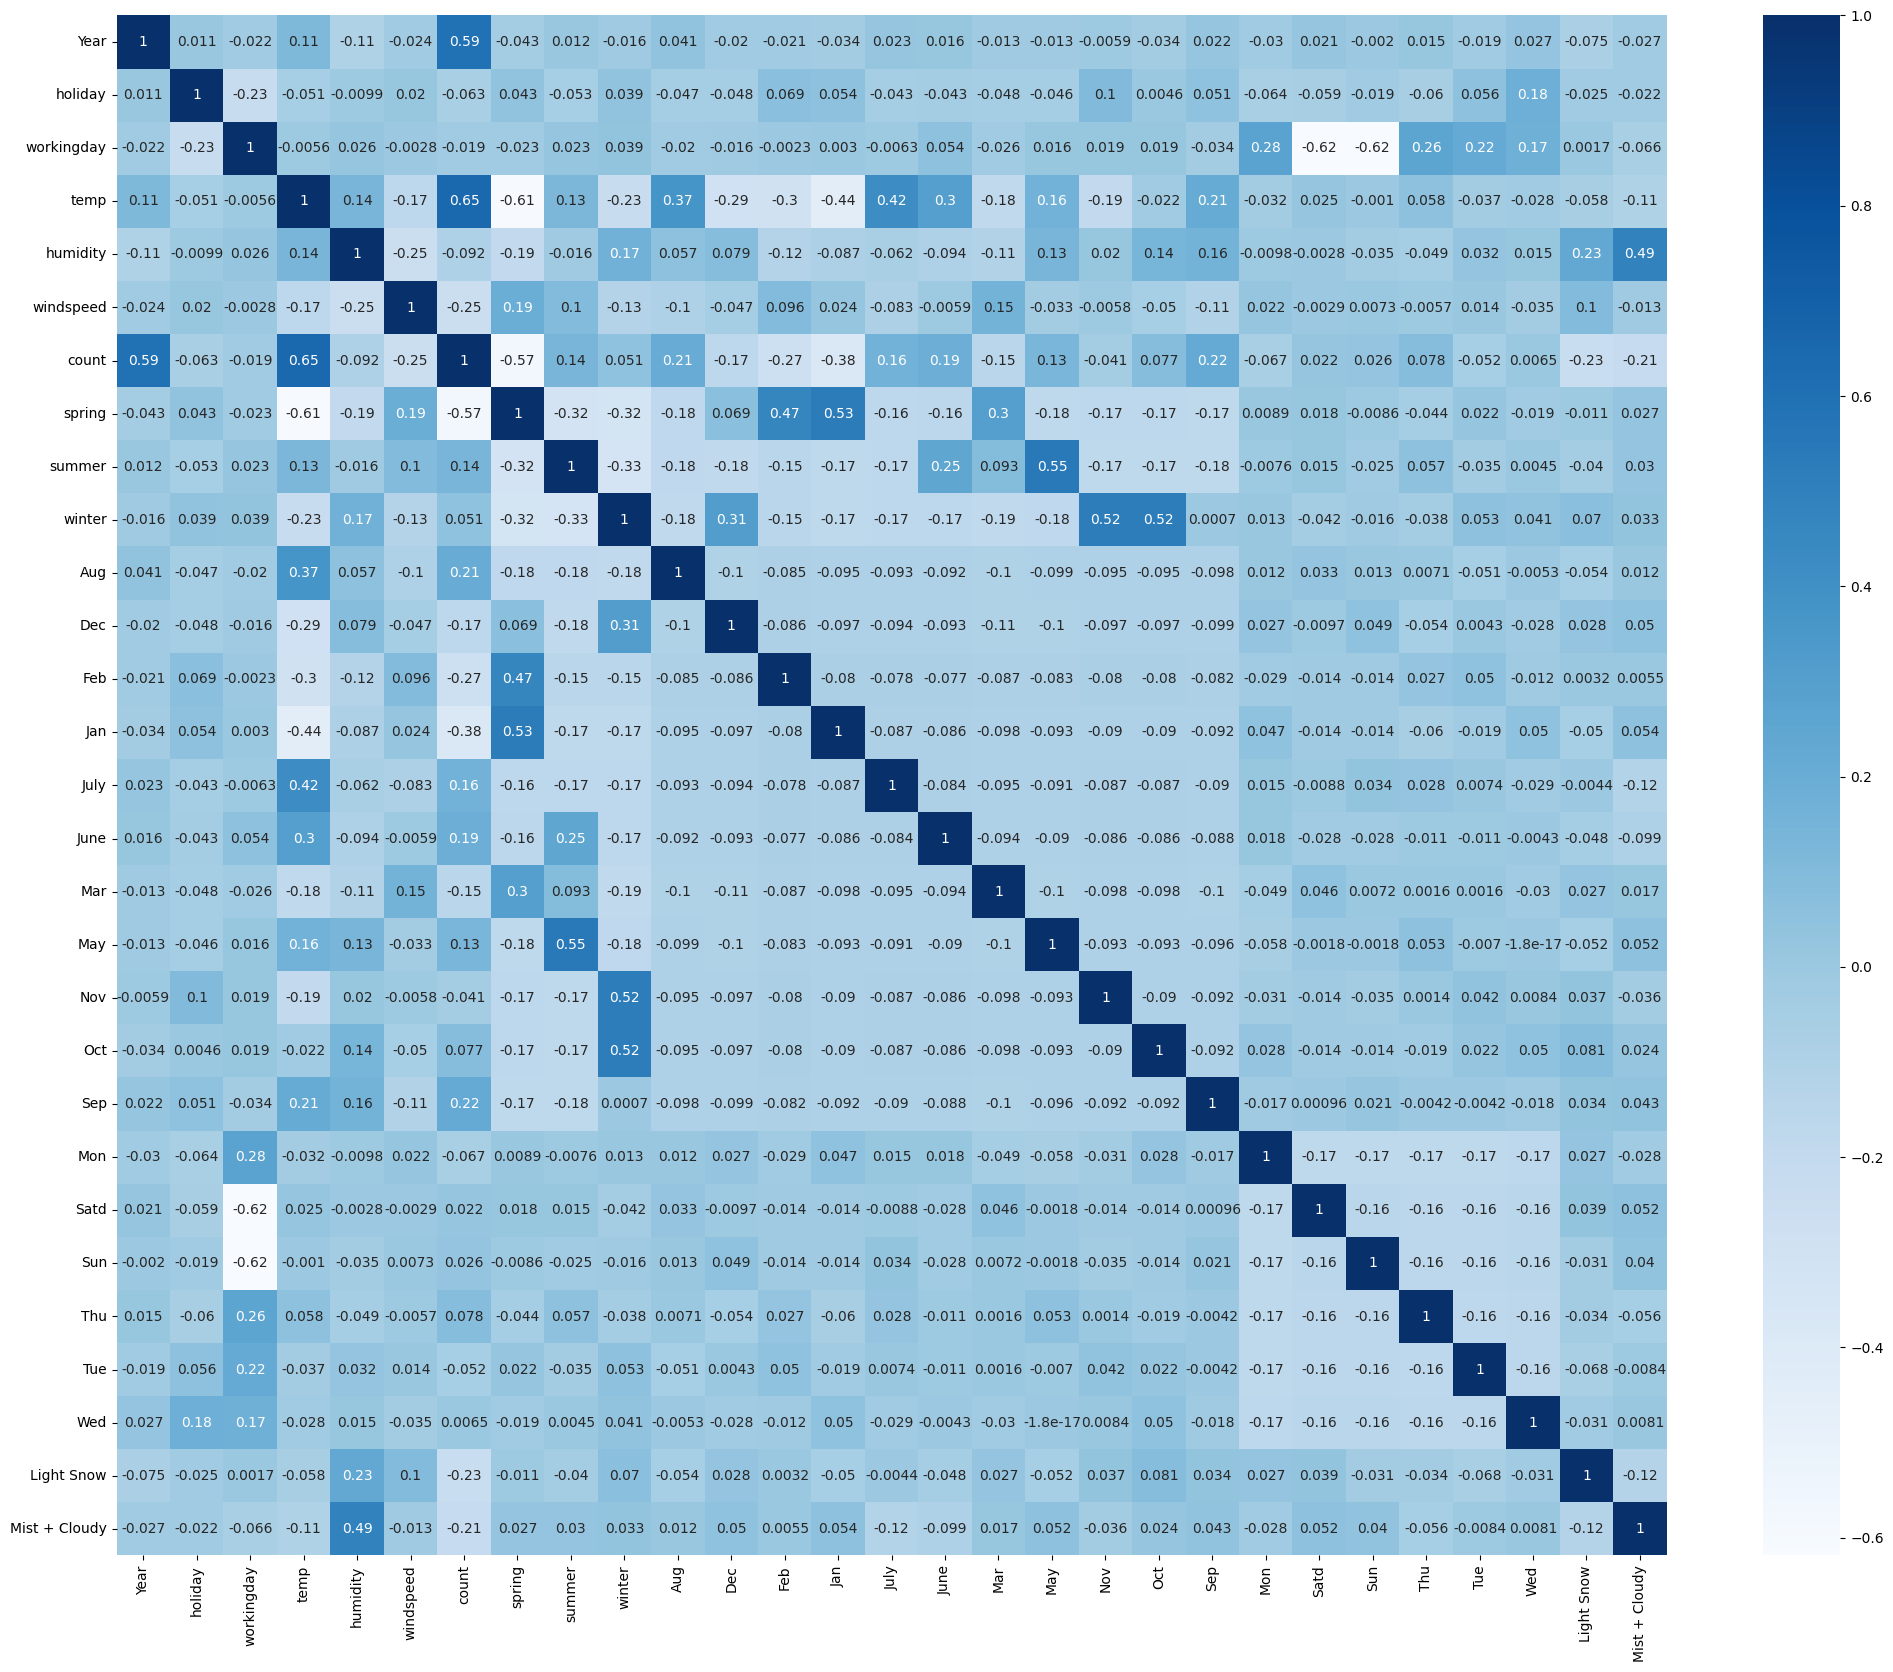

In [138]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(df_train.corr(),cmap='Blues',annot = True)
plt.show()

**X_train , y_train**

In [139]:
y_train = df_train.pop('count')
X_train = df_train

In [140]:
y_train.head()

626    7591
363    2999
425    3194
728    1796
482    4220
Name: count, dtype: int64

In [141]:
X_train.head()

,Year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Satd,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy
626,1,0,1,0.614763,0.553027,0.371638,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
363,0,0,0,0.314673,0.656076,0.197852,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
425,1,0,0,0.366591,0.677114,0.220569,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [142]:
X_train.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July',
       'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Satd', 'Sun', 'Thu',
       'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

# **Building a linear model**

**Approach**

* A mixed approach is followed.
* 15 Best columns are chosen using RFE
* And then p-value method is followed for further elimination.

#### **RFE Recursive Feature Elimination**

In [143]:
# Selecting 15 Features using RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_estimator = LinearRegression()

rfe = RFE(lr_estimator,n_features_to_select=15, step=1)

selector = rfe.fit(X_train,y_train)


In [144]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,Year
22,1,True,Sun
21,1,True,Satd
19,1,True,Sep
17,1,True,Nov
16,1,True,May
26,1,True,Light Snow
8,1,True,winter
13,1,True,July
27,1,True,Mist + Cloudy


In [145]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['Year', 'Sun', 'Satd', 'Sep', 'Nov', 'May', 'Light Snow', 'winter',
       'July', 'Mist + Cloudy', 'spring', 'workingday', 'windspeed',
       'humidity', 'temp'], dtype=object)

#### **Manual Elimination**

In [146]:
# Following a stepwise elimination
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [147]:
def ols_fit(y,X) :
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) :
    mel_df = sm.add_constant(X)
    vif = [variance_inflation_factor(mel_df.values,i) for i in range(mel_df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = mel_df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

##### **Model 1**

* Using features selected by RFE :
> 'Year', 'Sun', 'Satd', 'Sep', 'Nov', 'May', 'Light Snow', 'winter', 'July', 'Mist + Cloudy', 'spring', 'workingday', 'windspeed', 'humidity', 'temp'

In [148]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     192.0
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          6.20e-195
Time:                        16:17:34   Log-Likelihood:                -4101.6
No. Observations:                 510   AIC:                             8235.
Df Residuals:                     494   BIC:                             8303.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2332.1890    363.058      6.424

##### **Model 2**
* Dropping **Nov** because this information might also be contained in **winter**

In [149]:
del_feature = 'Nov'
selected_features = selected_features[selected_features!=del_feature]
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     203.9
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          4.18e-195
Time:                        16:32:31   Log-Likelihood:                -4104.0
No. Observations:                 510   AIC:                             8238.
Df Residuals:                     495   BIC:                             8301.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2249.7989    362.338      6.209

##### **Model 3**
* Dropping **July** because this information might also be contained in **windspeed**

In [151]:
del_feature = 'July'
selected_features = selected_features[selected_features!=del_feature]
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          3.97e-192
Time:                        16:36:19   Log-Likelihood:                -4113.9
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     496   BIC:                             8315.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2321.9658    368.679      6.298

### Verifying MultiCollinearity

In [152]:
vif(X_train[selected_features])

            index         vif
0           const  113.466905
10     workingday   10.926340
3            Satd    6.933982
2             Sun    6.919273
9          spring    2.699515
13           temp    2.653253
12       humidity    1.945861
7          winter    1.903833
8   Mist + Cloudy    1.613037
6      Light Snow    1.245317
5             May    1.179808
11      windspeed    1.165407
4             Sep    1.104914
1            Year    1.037700


VIF < 5 for selected features. No significant multicollinearity observed. Similar indicating comparison of R-squared and adjusted R-squared.

## **Final Model**

In [153]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          3.97e-192
Time:                        16:37:45   Log-Likelihood:                -4113.9
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     496   BIC:                             8315.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2321.9658    368.679      6.298

* 10 features have been selected.
* All the features are statistically significant [low p-value]
* The model over is a good fit with Prob (F-statistic): 3.97e-192
* The model explains 83.6% variability in the training data. Adjusted R-square being 83.3%

## **Residual Analysis**

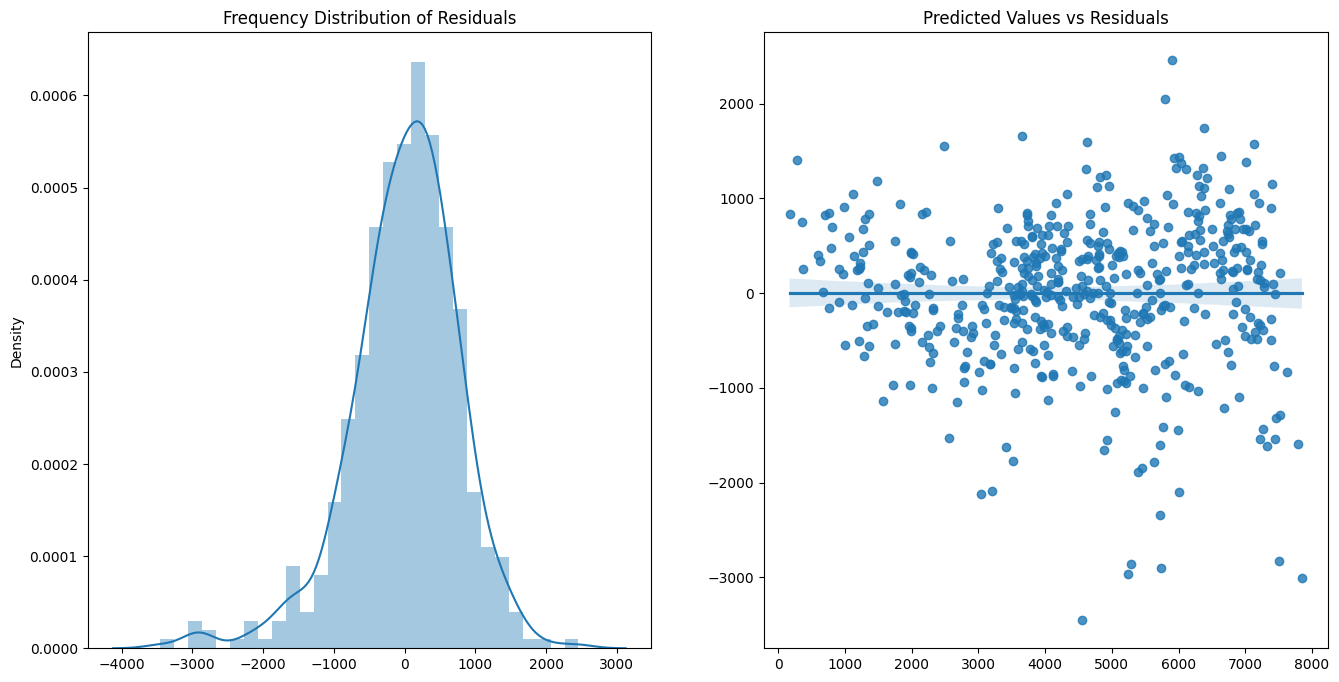

In [156]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
sns.regplot(x=y_train_pred, y= y_train-y_train_pred, ax=ax[1])

plt.show()

In [157]:
# Mean of Residuals
(y_train-y_train_pred).mean()

8.484158909185698e-12

* Residual errors follow a normal distribution with mean=0
* Variance of Errors doesn't follow any trends
* Residual errors are independent of each other since the Predicted values vs  Residuals plot doesn't show any trend.

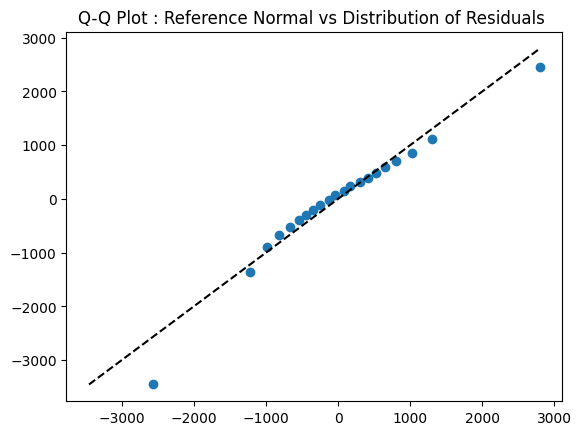

In [158]:
# Verifying the normality of distribution of residuals
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()


* This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data. Extrapolated points show significant predict inaccuracy.

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

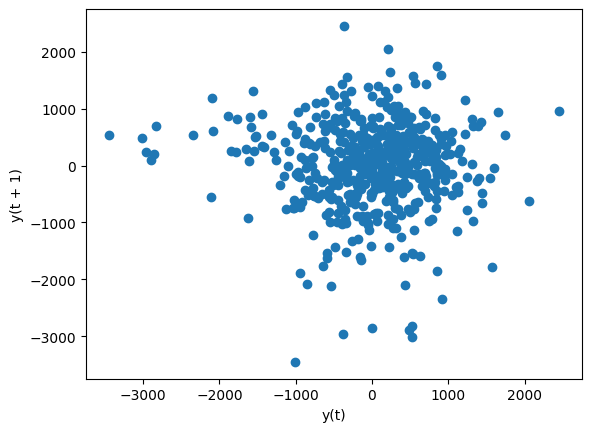

In [159]:
# lag plot to assess independence of data points
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)

* Lagplot of residuals shows no trend. Hence the error terms have constant variance

**Hence, assumptions of Linear Regression are satisfied by this model**

### **Prediction**

In [161]:
y_test = df_test.pop('count')
X_test = df_test
X_test[num_vars] = numerical_scaler.transform(X_test[num_vars])
X_test = X_test[selected_features]

In [162]:
X_test = sm.add_constant(X_test)
y_test_pred = final_model.predict(X_test)


### **Model Evaluation**

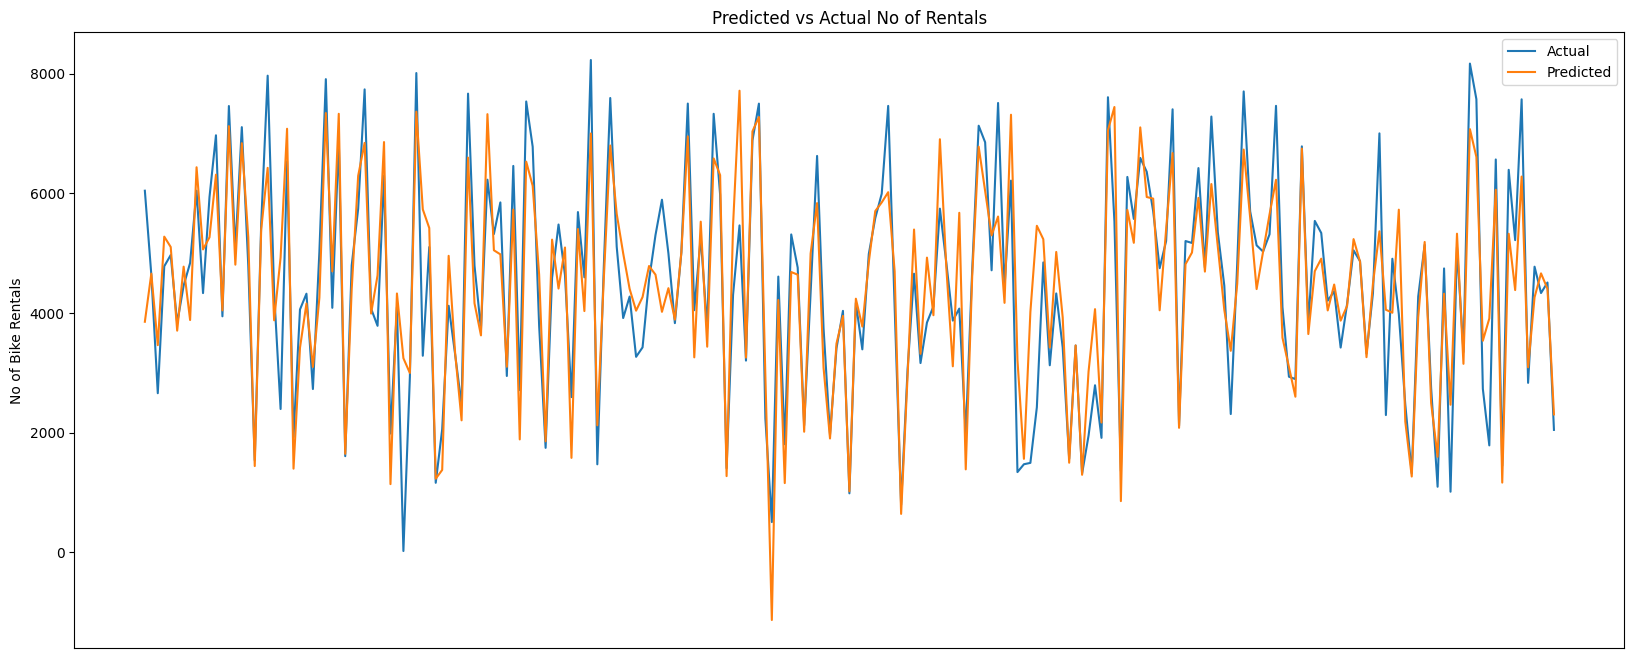

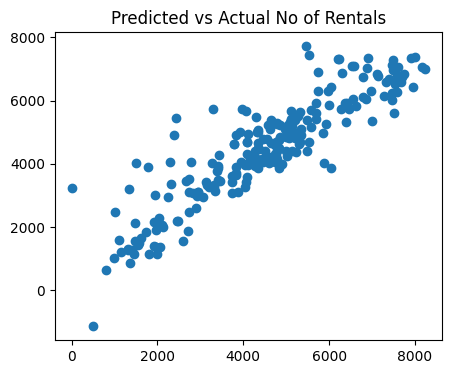

In [170]:
# Plotting Actual vs Predicted No of rentals
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[5,4])
plt.scatter(y_test,y_test_pred);
plt.title('Predicted vs Actual No of Rentals');

* Predicted vs observed value plots shows that the model is reasonably accurate.

In [171]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.85
R-squared for test data: 0.8
Mean Squared Error 693468.335


### **Model Stability**

In [172]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.800024  , 0.78780483, 0.9163711 , 0.86579791, 0.79020038,
       0.80486023, 0.73762864, 0.81959612, 0.8601125 , 0.90798246])

In [173]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.83 (+/- 0.11)


In [174]:
selected_features

array(['Year', 'Sun', 'Satd', 'Sep', 'May', 'Light Snow', 'winter',
       'Mist + Cloudy', 'spring', 'workingday', 'windspeed', 'humidity',
       'temp'], dtype=object)

### **Top Features**

In [176]:
# standardizing numerical variables

from sklearn.preprocessing import StandardScaler
reg_features = selected_features
scaler = StandardScaler()
data = X_train[selected_features]
std_num = scaler.fit(data[['temp','windspeed','humidity']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed','humidity']]), columns=['temp','windspeed','humidity'])
for i in reg_features :
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [2321.96581013]


,MLR Coefficients
temp,3810.549762
Year,1998.845434
Sun,835.536673
Satd,829.321153
Sep,732.463113
workingday,700.401815
winter,592.526023
May,512.819449
Mist + Cloudy,-508.554330
spring,-928.020052


* Upon standardized the values of predictor variables, the above shows that the top features influencing demand are temp, followed by Year and hum
* In case of continuous variables, the above data could be interpreted as - With every standard deviation increase in continuous variables, demand increases, when all other modelled paramters are held unchanged.
* In case of categorical variables, the above data could be interpreted as - Compared to the reference level, the change in demand, when all other modelled paramters are held unchanged.

### **Conclusion**

Analysis is carried out using a Mixed Feature Selection Approach. 15 features are selected algorithmically using Recursive Feature Elimination. Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. The 13 most significant features to understand demand have been reported.

The data set is randomly divided into training and test data. Final Model built on training data set explains 85% of the variability and achieves 80% on test data.

The final relationship between demand and predictors is as follows.
> count = 2392.0791 + 1998.845434 Year + 829.321153 Satd + 592.526023 winter -928.020052 spring + 700.401815 workingday -1558.221645 humidity + 3810.549762 - 1252.858150 windspeed - 1914.405240 light snow/rain

where temp , windspeed and hum are normalized.

**Note :**

* Data has been cleaned to drop outliers that might affect the model adversely
* The model has been verified for Multicollinearity effects.
* Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit homoscedasticity)
* Q-Q plot between residual distribution and normal distribution shows that residuals follow a normal distribution for all interpolations. Extraplorations show significant deviation, not affecting Linear Regression applicability.
* Further Lag plot shows there is no auto-correlation in data.
* Model is stable at 83%(+/-11%) coefficient of determination at 95% CI, ascertained through cross validation.
* Features in the order of influence has been reported by standardizing all predictor values.

